In [12]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
# Carrega o dataset como dataframe
df = pd.read_csv('dataset/video_games_2016.csv')

In [14]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
print(len(df), "linhas")
df.columns

16719 linhas


Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [16]:
gp_by_region_df = df.groupby(['Year_of_Release']).agg({
    "NA_Sales": "sum",
    "EU_Sales": "sum",
    "JP_Sales": "sum",
    "Other_Sales": "sum",
    "Global_Sales": "sum",
}).reset_index()

sorted = gp_by_region_df.sort_values('Year_of_Release', ascending=True)

sorted.head(10)

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1980.0,10.59,0.67,0.00,0.12,11.38
1,1981.0,33.40,1.96,0.00,0.32,35.77
2,1982.0,26.92,1.65,0.00,0.31,28.86
3,1983.0,7.76,0.80,8.10,0.14,16.79
4,1984.0,33.28,2.10,14.27,0.70,50.36
5,1985.0,33.73,4.74,14.56,0.92,53.94
6,1986.0,12.50,2.84,19.81,1.93,37.07
7,1987.0,8.46,1.41,11.63,0.20,21.74
8,1988.0,23.87,6.59,15.76,0.99,47.22
9,1989.0,45.15,8.44,18.36,1.50,73.45


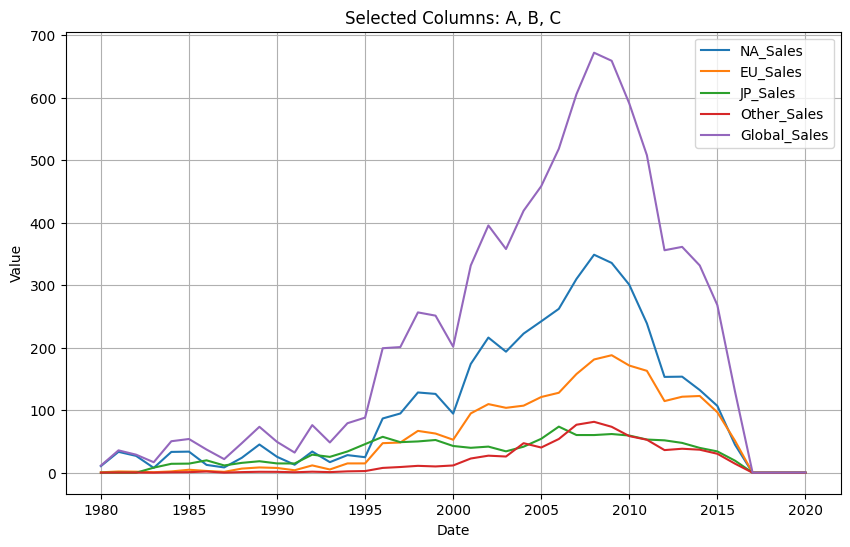

In [23]:
prf = "_Sales"
f = {
    "NA": "b",
    "EU": "purple",
    "JP": "r",
    "Other": "y",
    "Global": "y"
}

cols = []
for i, c in f.items():
    cols.append(i+prf)


ax = sorted.plot(x="Year_of_Release", y=cols, figsize=(10, 6), title="Vendas por ano")

# Add labels and grid
ax.set_xlabel("Ano de lançamento")
ax.set_ylabel("Vendas")
ax.grid(True)

plt.show()